# Projet : Participez à un concours sur la Smart City
***

**Contexte** : en tant que Data Scientist indépendant, je souhaite travailler sur un projet issu du site de l'ONG "Data is for Good".  
**Projet** : aider Paris à devenir une Smart City. J'ai à ma disposition un jeu de données sur les arbres de Paris avec leurs différentes caractéristiques. En revanche, je ne connaîs pas les moyens techniques (employés, véhicules, outils...) pour la mise en oeuvre suite à ce projet.  
**Objectif** : étudier le jeu de données afin d'extraire les informations pertinentes permettant aux décisionnaires d'élaborer un plan d'action optimal (trajet et ressources) pour l'entretien des arbres de Paris.

***
# I) Présentation générale du jeu de données

Le jeu de données est téléchargeable avec le [lien](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/AI+Engineer/Project+2+Participez+%C3%A0+un+concours+sur+la+Smart+City/p2-arbres-fr.csv) et est visualisable sur [opendata.paris.fr](https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86844,2.30945&basemap=jawg.streets).

Il présente une liste de 200 137 arbres caractérisés par 18 colonnes :
- `id` : identifiant unique de l'arbre
- `type_emplacement` : valeur toujours "Arbre", ne sera pas utile
- `domanialite` : type de possession de l'Etat pour le domaine public (cimetière, périphérique...)
- `arrondissement` : arrondissement de Paris ou département de la petite couronne dans lequel est situé l'arbre
- `complement_adresse` : apporte un complément à l'adresse initiale pour la localisation, à **80% vide**, ne sera pas utile
- `numero` : numéro dans la rue où l'arbre est localisé, à **100% vide**, ne sera pas utile
- `lieu` : lieu (cimetière, parc...) ou adresse (rue, avenue...) où se situe l'arbre, près de **7 000 différents**.
- `id_emplacement` : identifiant alphanumérique de l'emplacement
- `libelle_francais` : genre de l'arbre en français courant (chêne, érable...)
- `genre` : genre de l'arbre en latin (quercus, acer...)
- `espece` : espèce de l'arbre en latin (rubra, pseudoplatanus...), plus de **500 différentes**.
- `variete` : variété de l'arbre, plus de **400 différentes**, à **80% vide**, ne sera pas utile.
- `circonference_cm` : circonférence de l'arbre en cm. **13% de valeurs à zéro**. Valeurs maximum à **250 m**.
- `hauteur_m` : hauteur de l'arbre en m. **20% de valeurs à zéro**. Valeur maximum à **880 km**.
- `stade_developpement` : stade de développement observé : Adulte, Jeune, Jeune Adulte et Mature. **Manque 30% des données**, à voir pour combler.
- `remarquable` : renseigne si l'arbre est de type remarquable, càd repéré par ses diverses propriétés (rareté, dimensions, âge...). **Manque 30% des données**, à voir pour combler.
- `geo_point_2d_a` : latitude de la coordonnée de l'arbre.
- `geo_point_2d_b` : longitude de la coordonnée de l'arbre.

On peut distinguer 3 catégories de colonne : 
- **identification** : identifiant unique, genre, espèce, variété…
- **dimensions** : hauteur, circonférence, stade de développement…
- **localisation** : arrondissement, domanialité, coordonnées géographiques…

En combinant les données disponibles sur ce jeu de données et mes connaissances sur les métiers du paysagisme, je peux distinguer 2 catégories renfermant les variables pouvant contribuer à l'étude : 
- La **nature de l’entretien** avec les caractéristiques physiques `circonference_cm`, `hauteur_m`, `genre`, `stade_developpement`, `remarquable` et `libelle_francais`
- L'**élaboration d’un trajet** avec la localisation `domanialite`, `arrondissement`, `geo_point_2d_a` et `geo_point_2d_b`

***
# II) Démarche méthodologique d'analyse de données

Les colonnes `id`, `id_emplacement`, `type_emplacement`, `complement_adresse`, `numero`, `variete`, `espece` et `lieu`, presque **50% des colonnes**, ne seront pas exploités pour les raisons suivantes : 
- manque de données (plus de 80%)
- trop de catégories différentes (plusieurs centaines, voire des milliers)

## 1) Nettoyage du jeu de données

Il y a des colonnes avec des données non renseignées : 
- `genre` : 16 valeurs remplacées par "Autre"
- `stade_developpement` : 30% des valeurs remplacées par "Autre"
- `remarquable` : 30% des valeurs remplacées par "Non"
- `domanialite` : 1 valeurs remplacée par "Autre"

Pour pouvoir exploiter la colonne `arrondissement`, je l'ai converti en entier dans la colonne `arrond` en faisant les approximations suivantes : 
- les arrondissements vont de **1 à 20**
- les départements de la petite couronne Hauts de Seine, Val de Marne et Seine St Denis sont respectivement **92, 93 et 94**
- le Bois de Vincenne est dans le département du Val de Marne **94**, 6% des arbres
- le Bois de Boulogne est dans le département des Hauts de Seine **92**, 2% des arbres

Concernant les dimensions `circonference_cm`, `hauteur_m`, regardons les extrêmes : 
- valeurs à zéro : 
    - `circonference_cm` : **13%** des valeurs, calées à 1
    - `hauteur_m` : **20%** des valeurs, calées à 1
- valeurs maximum aberrantes : 
    - `circonference_cm` : **82 valeurs**, calées au maximum relevé sur Paris 7 m
    - `hauteur_m` : **558 valeurs** (moins de 1% des valeurs), calées au maximum relevé sur Paris 31 m

Pour une meilleure compréhension de l'auditoir, je calcule le **diamètre global en cm** à partir de la circonférence dans une nouvelle colonne `diametre_cm`.

## 2) Analyse des données

***
<font size="5"><center>**Diamètre des arbres**</center></font>

<font size="4">Répartition centrée autour de la valeur moyenne 25 cm</font>|<font size="4">Diamètre majoritairement entre 10 et 35 cm</font>
:-:|:-:
![](diam_h.png)|![](diam_bp.png)

***
<font size="5"><center>**Hauteur des arbres**</center></font>

<font size="4">Répartition des hauteurs par tranche 1, 5, 10 et 15 m</font>|<font size="4">Hauteur majoritairement entre 5 et 12 m</font>
:-:|:-:
![](haut_h.png)|![](haut_bp.png)

***
<font size="5"><center>**Répartition par arrondissement / département**</center></font>

<font size="3">Plus on s'éloigne du centre, plus le nombre augmente</font>|<font size="3">Arbres remarquables principalement dans 12e et 16e</font>
:-:|:-:
![](arr_dep_h.png)|![](arr_dep_rem_h.png)
<font size="3">80% des arbres sont localisés dans les arrondissements et les départements autour du périphérique.</font>|<font size="3">50% des arbres remarquables sont dans les arrondissements du 12e, 16e et 20e.</font>

***
<font size="5"><center>**Répartition par domanialité**</center></font>

<font size="3">80 % au niveau des alignements, des cimetières et des jardins</font>|<font size="3">90 % des arbres remarquables dans les jardins</font>
:-:|:-:
![](dom_h.png)|![](dom_rem_h.png)

***
<font size="5"><center>**Localisation par tranche de taille**</center></font>

En fonction de la taille d'un arbre, le besoin en matériel et plus précisément en type de nacelle est différent. Les arbres peuvent alors être répartis en 3 catégories : 
- petits, entre 0 et 4 m
- moyens, entre 4 et 15 m
- grands, au delà de 15 m

<font size="4">Répartition des petits arbres allant jusqu'à 4 m</font>|<font size="4">Répartition des grands arbres au-dela de 15 m</font>
:-:|:-:
![](map_petits_arbres.png)|![](map_grands_arbres.png)
<font size="4">Il y a une forte densité de petits arbres dans les cimetières de Pantin, de Bagneux et de Thiais</font>|<font size="4">Il y a une forte densité de grands arbres dans les cimetières du Père Lachaise, d'Ivry et de Thiais et le parc Montsouris</font>

<font size="3">Répartition des petits arbres par domanialité</font>|<font size="3">Hauteur des arbres dans les 3 domanialités principales</font>
:-:|:-:
![](peti_arb_par_dom.png)|![](boxplot_h_dom.png)
<font size="4">Les petits arbres sont surtout situés dans les cimetière et les parcs et jardins</font>|<font size="4">Dans les cimetières et les parcs et jardins, les arbres vont majoritairement jusqu'à 10m</font>

<font size="4"><center>Hauteurs des arbres par arrondissement / département</center></font>
![](boxplot_h_arrond.png)
<font size="4">
Globalement, la majorité des arbres ne dépasse pas les 15 m.  
La plus grande densité de grands arbres est dans les 6e, 7e et 8e arrondissements. Les plus grandes répartitions de hauteur sont dans le 19e arrondissement et le 94.</font>

<font size="5"><center>Répartition par espèces d'arbre</center></font>
![](pie_esp_french_2.png)
<font size="4">60 % des arbres appartiennent aux espèces suivantes : Platane, Marronnier, Tilleul, Erable et Sophora.</font>

***
# I) Présentation générale du jeu de données

In [1]:
# import des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px

In [2]:
# chargement de données
data = pd.read_csv("p2-arbres-fr.csv", sep=";")
# taille du dataset
data.shape

(200137, 18)

In [3]:
# data.boxplot(column="hauteur_m", vert=True, showfliers=True)
# plt.ylabel("Hauteur en m")
# plt.xticks([1], [''])
# plt.ylim((0, 50))
# data.boxplot(column="circonference_cm", vert=False, showfliers=True)
# plt.xlabel("Circonférence en cm")
# plt.yticks([1], [''])
# plt.xlim((0, 1000))

In [4]:
# valeurs manquantes pour voir ce qui peut être exploiter
valeurs_manquantes = data.isnull().mean().sort_values(ascending=False)
print(valeurs_manquantes)

numero                 1.000000
complement_addresse    0.845596
variete                0.816241
stade_developpement    0.335795
remarquable            0.315274
espece                 0.008754
libelle_francais       0.007480
genre                  0.000080
domanialite            0.000005
circonference_cm       0.000000
geo_point_2d_a         0.000000
hauteur_m              0.000000
id                     0.000000
type_emplacement       0.000000
id_emplacement         0.000000
lieu                   0.000000
arrondissement         0.000000
geo_point_2d_b         0.000000
dtype: float64


In [5]:
# type de données pour vérifier que les valeurs ont les bons types
data.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

In [6]:
# nettoyage des données pour voir les outliers notamment
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


In [7]:
# valeurs numériques à 0
circ_a_zero = data.loc[data["circonference_cm"]==0]
haut_a_zero = data.loc[data["hauteur_m"]==0]
print("Circ. à zéro : ", len(circ_a_zero), " - ", len(circ_a_zero)/len(data))
print("Haut. à zéro : ", len(haut_a_zero), " - ", len(haut_a_zero)/len(data))

Circ. à zéro :  25867  -  0.1292464661706731
Haut. à zéro :  39219  -  0.19596076687469083


In [8]:
# valeurs uniques par variables qualitatives pour déterminer la pertience de leur utilisation
for col in data.columns:
    print(col, " : ", str(len(data[col].unique())))

id  :  200137
type_emplacement  :  1
domanialite  :  10
arrondissement  :  25
complement_addresse  :  3796
numero  :  1
lieu  :  6921
id_emplacement  :  69040
libelle_francais  :  193
genre  :  176
espece  :  540
variete  :  437
circonference_cm  :  531
hauteur_m  :  143
stade_developpement  :  5
remarquable  :  3
geo_point_2d_a  :  200107
geo_point_2d_b  :  200114


***
# II) Démarche méthodologique d'analyse de données

## 1) Nettoyage du jeu de données

In [9]:
# valeurs à NaN
nan_values = ["genre", "stade_developpement", "remarquable", "domanialite"]
for nan_val in nan_values:
    temp_nb = len(data.loc[data[nan_val].isnull(),:])
    print(nan_val, " : ", str(temp_nb), " soit : ", str(round(temp_nb/len(data)*100, 2)), " %.")

genre  :  16  soit :  0.01  %.
stade_developpement  :  67205  soit :  33.58  %.
remarquable  :  63098  soit :  31.53  %.
domanialite  :  1  soit :  0.0  %.


In [10]:
# on cale les NaN à "Autre"
data.loc[data["remarquable"].isnull(), "remarquable"] = 0.0
data.loc[data["genre"].isnull(),"genre"] = "Autre"
data.loc[data["domanialite"].isnull(), "domanialite"] = "Autre"
data.loc[data["stade_developpement"].isnull(), "stade_developpement"] = "Autre"

In [11]:
# caler les zéros à 1 pour les dimensions
data.loc[data["hauteur_m"]==0,"hauteur_m"] = 1
data.loc[data["circonference_cm"]==0,"circonference_cm"] = 1

In [12]:
# valeurs max pour les dimensions
circ_max = data.loc[data["circonference_cm"]>700]
haut_max = data.loc[data["hauteur_m"]>31]
print("Circ. max : ", len(circ_max), " - ", round(len(circ_max)/len(data)*100, 2), "%")
print("Haut. max : ", len(haut_max), " - ", round(len(haut_max)/len(data)*100, 2), "%")

Circ. max :  82  -  0.04 %
Haut. max :  558  -  0.28 %


In [13]:
# on cale les valeurs max à leur valeur max réelle
data.loc[data["circonference_cm"]>700, "circonference_cm"] = 700
data.loc[data["hauteur_m"]>31, "hauteur_m"] = 31

In [14]:
# calcul du diamètre en m pour compréhension humaine
# data["diametre_cm"] = data["circonference_cm"]/math.pi

In [15]:
# cas des arbres dans les bois
bois = ["BOIS DE VINCENNES", "BOIS DE BOULOGNE"]
for b in bois:
    temp_bois = data.loc[data["arrondissement"]==b,:]
    print("Il y a ", str(len(temp_bois)), " arbres dans le ", b, " càd ", round(len(temp_bois)/len(data)*100, 2), "%")


Il y a  11510  arbres dans le  BOIS DE VINCENNES  càd  5.75 %
Il y a  3978  arbres dans le  BOIS DE BOULOGNE  càd  1.99 %


In [60]:
# colonne arrond
data.loc[data["arrondissement"].str.contains('ARRDT'),"arrond"] = data.loc[data["arrondissement"].str.contains('ARRDT'),"arrondissement"].str.split(' ').str[1].str[:-1]
data.loc[data["arrondissement"]=='VAL-DE-MARNE',"arrond"] = 94
data.loc[data["arrondissement"]=='SEINE-SAINT-DENIS',"arrond"] = 93
data.loc[data["arrondissement"]=='HAUTS-DE-SEINE',"arrond"] = 92
data.loc[data["arrondissement"]=='BOIS DE VINCENNES',"arrond"] = 12
data.loc[data["arrondissement"]=='BOIS DE BOULOGNE',"arrond"] = 16
data.loc[data["arrond"]=='1E',"arrond"] = 1
data.arrond = data.arrond.astype(int)

## 2) Analyse des données

### a) Diamètre

moyenne :  80.00524640621174
médiane :  70.0
mode :  0    1
Name: circonference_cm, dtype: int64
min :  1
max :  700
quartiles :  [30.0, 115.0]
variance :  4092.8101574984807
écart-type :  63.97507450170325
coefficient de variation :  0.7996359910809063
skewness :  1.4141633731935483
kurtosis :  5.609939383020544


Text(115.0, 50605.6425, ' 115 cm')

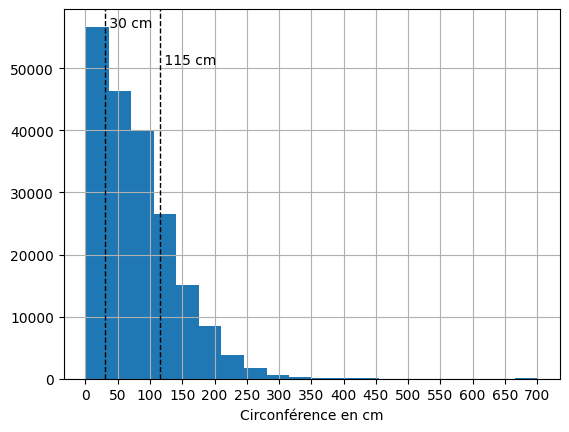

In [17]:
# Etude du diamètre
# mesures de tendances centrales
print("moyenne : ", data["circonference_cm"].mean())
print("médiane : ", data["circonference_cm"].median())
print("mode : ", data["circonference_cm"].mode())
print("min : ", data["circonference_cm"].min())
print("max : ", data["circonference_cm"].max())
quartiles = [np.percentile(data["circonference_cm"], p) for p in [25, 75]]
print("quartiles : ", quartiles)
# mesures de dispersion
print("variance : ", data["circonference_cm"].var(ddof=0))
print("écart-type : ", data["circonference_cm"].std(ddof=0))
print("coefficient de variation : ", data["circonference_cm"].std(ddof=0)/data["circonference_cm"].mean())
# mesures de forme
print("skewness : ", data["circonference_cm"].skew())
print("kurtosis : ", data["circonference_cm"].kurtosis())
data["circonference_cm"].hist(bins=20)
plt.xlabel("Circonférence en cm")
min_ylim, max_ylim = plt.ylim()
plt.xticks(np.arange(0, 701, 50))
plt.axvline(quartiles[0], color='k', linestyle='dashed', linewidth=1)
plt.text(quartiles[0], max_ylim*0.95, ' {:.0f} cm'.format(quartiles[0]))
plt.axvline(quartiles[1], color='k', linestyle='dashed', linewidth=1)
plt.text(quartiles[1], max_ylim*0.85, ' {:.0f} cm'.format(quartiles[1]))

In [18]:
# circonférence > 200 cm
nb_circ_sup = data.loc[data["circonference_cm"]>=150,:]
print("Les arbres ayant une circonférence de plus de 150 cm représentent ", round(len(nb_circ_sup)/len(data)*100, 1), " % du total.")

Les arbres ayant une circonférence de plus de 150 cm représentent  14.0  % du total.


([<matplotlib.axis.YTick at 0x7fa4a8392740>], [Text(0, 1, '')])

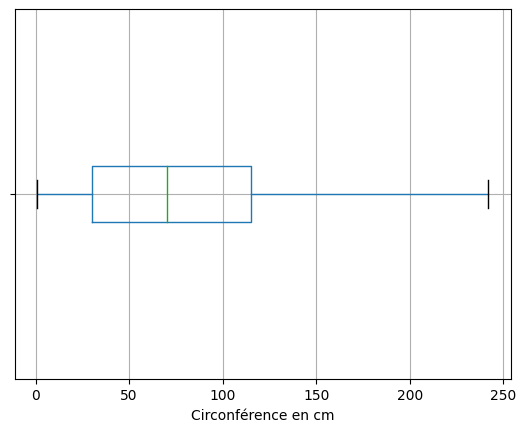

In [19]:
data.boxplot(column="circonference_cm", vert=False, showfliers=False)
plt.xlabel("Circonférence en cm")
plt.yticks([1], [''])

In [20]:
# # Etude du diamètre
# # mesures de tendances centrales
# print("moyenne : ", data["diametre_cm"].mean())
# print("médiane : ", data["diametre_cm"].median())
# print("mode : ", data["diametre_cm"].mode())
# print("min : ", data["diametre_cm"].min())
# print("max : ", data["diametre_cm"].max())
# # mesures de dispersion
# print("variance : ", data["diametre_cm"].var(ddof=0))
# print("écart-type : ", data["diametre_cm"].std(ddof=0))
# print("coefficient de variation : ", data["diametre_cm"].std(ddof=0)/data["diametre_cm"].mean())
# # mesures de forme
# print("skewness : ", data["diametre_cm"].skew())
# print("kurtosis : ", data["diametre_cm"].kurtosis())
# data["diametre_cm"].hist(bins=20)
# plt.xlabel("Diamètre en cm")

### b) Hauteur

moyenne :  8.575046093426003
médiane :  8.0
mode :  0    1
Name: hauteur_m, dtype: int64
min :  1
max :  31
quartiles :  [5.0, 12.0]
variance :  36.174236124253824
écart-type :  6.014502150989209
coefficient de variation :  0.7013958975217851
skewness :  0.6856688093269894
kurtosis :  0.22303759639238674


Text(12.0, 36689.782499999994, ' 12 cm')

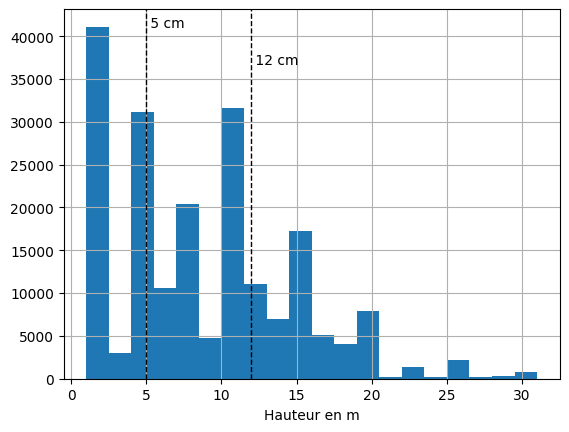

In [21]:
# Etudes des hauteurs
data["hauteur_m"].hist(bins=20)
# mesures de tendances centrales
print("moyenne : ", data["hauteur_m"].mean())
print("médiane : ", data["hauteur_m"].median())
print("mode : ", data["hauteur_m"].mode())
print("min : ", data["hauteur_m"].min())
print("max : ", data["hauteur_m"].max())
quartiles = [np.percentile(data["hauteur_m"], p) for p in [25, 75]]
print("quartiles : ", quartiles)
# mesures de dispersion
print("variance : ", data["hauteur_m"].var(ddof=0))
print("écart-type : ", data["hauteur_m"].std(ddof=0))
print("coefficient de variation : ", data["hauteur_m"].std(ddof=0)/data["hauteur_m"].mean())
# mesures de forme
print("skewness : ", data["hauteur_m"].skew())
print("kurtosis : ", data["hauteur_m"].kurtosis())
plt.xlabel("Hauteur en m")
min_ylim, max_ylim = plt.ylim()
plt.axvline(quartiles[0], color='k', linestyle='dashed', linewidth=1)
plt.text(quartiles[0], max_ylim*0.95, ' {:.0f} cm'.format(quartiles[0]))
plt.axvline(quartiles[1], color='k', linestyle='dashed', linewidth=1)
plt.text(quartiles[1], max_ylim*0.85, ' {:.0f} cm'.format(quartiles[1]))

In [22]:
# circonférence > 15 m
nb_haut_sup = data.loc[data["hauteur_m"]>=15,:]
print("Les arbres ayant une hauteur de plus de 15 m représentent ", round(len(nb_haut_sup)/len(data)*100, 1), " % du total.")

Les arbres ayant une hauteur de plus de 15 m représentent  19.8  % du total.


### c) Répartition

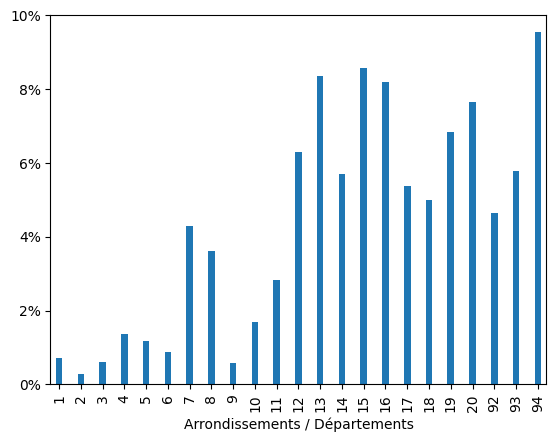

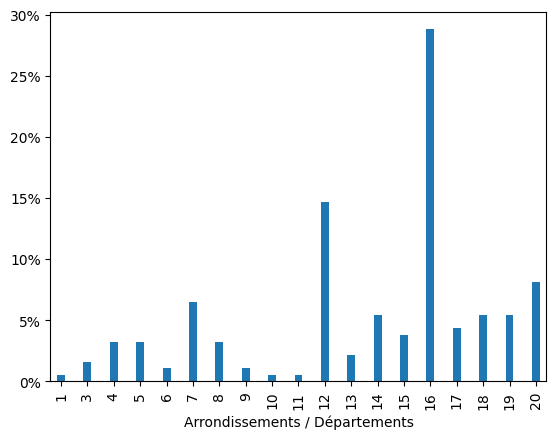

In [23]:
# Répartition des arbres par arrondissement
data["arrond"].value_counts(normalize=True).sort_index().mul(100).plot(kind='bar', width=0.3)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
plt.xlabel("Arrondissements / Départements")
plt.show()
# Répartition des arbres remarquables par arrondissement
data.loc[data["remarquable"]==1,"arrond"].value_counts(normalize=True).mul(100).sort_index().plot(kind='bar', width=0.3)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
plt.xlabel("Arrondissements / Départements")
plt.show()

In [24]:
# arbres dans arrondissements le long du périph
nb_long_periph = data.loc[data["arrond"]>=12,"arrond"]
print("Les arrondissements le long du périphérique représente ", round(len(nb_long_periph)/len(data)*100, 1), "%")

# arbres remarquables dans le 12 et 16
nb_remaq_tot = data.loc[(data["remarquable"]==1),"arrond"]
nb_remaq = data.loc[(data["remarquable"]==1) & ((data["arrond"]==12) | (data["arrond"]==16) | (data["arrond"]==20)),"arrond"]
print("Arbres remarquables du 12e, du 16e et du 20e : ", round(len(nb_remaq)/len(nb_remaq_tot)*100, 1), "%")

Les arrondissements le long du périphérique représente  82.0 %
Arbres remarquables du 12e, du 16e et du 20e :  51.6 %


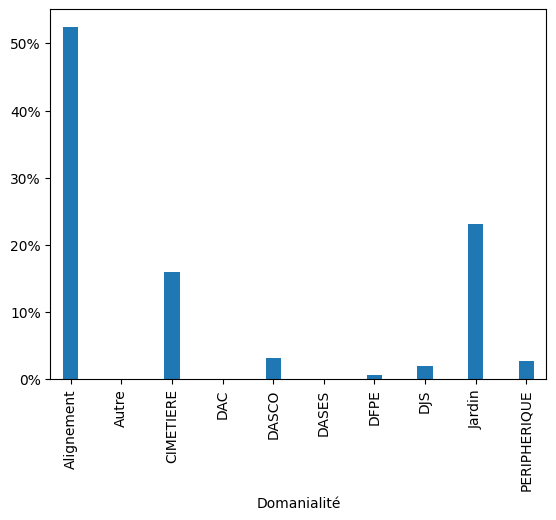

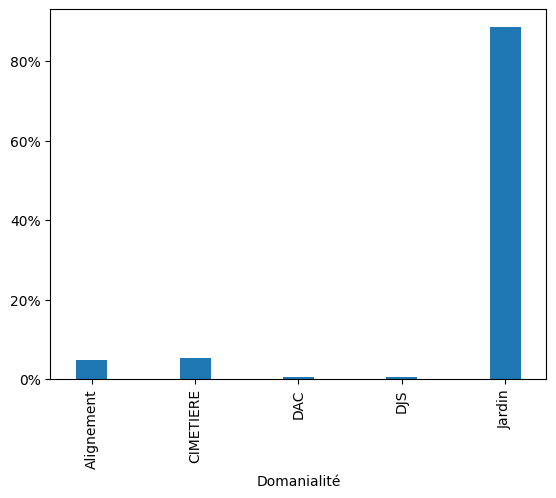

In [25]:
# Répartition des arbres par domanialité
data["domanialite"].value_counts(normalize=True).sort_index().mul(100).plot(kind='bar', width=0.3)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
plt.xlabel("Domanialité")
plt.show()
# Répartition des arbres remarquables par domanialité
data.loc[data["remarquable"]==1,"domanialite"].value_counts(normalize=True).mul(100).sort_index().plot(kind='bar', width=0.3)
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
plt.xlabel("Domanialité")
plt.show()

In [26]:
# arbres dans domanialité alignement cimetère jardin
nb_align_cim_jard = data.loc[(data["arrond"]>=12) & ((data["domanialite"]=="Jardin") | (data["domanialite"]=="Alignement") | (data["domanialite"]=="CIMETIERE")),"arrond"]
print("Les arrondissements le long du périphérique représente ", round(len(nb_long_periph)/len(data)*100, 1), "%")

# arbres remarquables les jardins
# nb_remaq_tot = data.loc[(data["remarquable"]==1),"arrond"]
nb_remaq_dom = data.loc[(data["remarquable"]==1) & (data["domanialite"]=="Jardin"),:]
print("Arbres remarquables dans les Jardin : ", round(len(nb_remaq_dom)/len(nb_remaq_tot)*100, 1), "%")

Les arrondissements le long du périphérique représente  82.0 %
Arbres remarquables dans les Jardin :  88.6 %


### d) Position sur la carte

In [39]:
# position dans l'espace
hauteurs_limite = {
    "petits": [0, 5],
    "moyens": [5, 12],
    "grands": [12, 32]
}

# for name, values in hauteurs_limite.items():
#     subset = data.loc[(data["hauteur_m"]>=values[0]) & (data["hauteur_m"]<values[1]),:]
#     fig = px.density_mapbox(subset,
#     lat='geo_point_2d_a', lon='geo_point_2d_b',
#     hover_data=['domanialite', 'lieu'],
#     radius=2,
#     zoom=10.6,
#     mapbox_style="open-street-map",
#     title="Localisation des " + str(len(subset)) + " " + name +" arbres, allant de " + str(values[0]) + " à " + str(values[1]) + " m.",
#     width=1000,
#     height=800,
#     )
#     fig.show()

In [40]:
# position dans l'espace
tranches_circ = {
    "petits": [0, 30],
    "moyens": [30, 115],
    "gros": [115, 701]
}

# for name, values in tranches_circ.items():
#     subset = data.loc[(data["circonference_cm"]>=values[0]) & (data["circonference_cm"]<values[1]),:]
#     fig = px.density_mapbox(subset,
#     lat='geo_point_2d_a', lon='geo_point_2d_b',
#     hover_data=['domanialite', 'lieu'],
#     radius=2,
#     zoom=10.6,
#     mapbox_style="open-street-map",
#     title="Localisation des " + str(len(subset)) + " " + name +" arbres, allant de " + str(values[0]) + " à " + str(values[1]) + " cm.",
#     width=1000,
#     height=800,
#     )
#     fig.show()

### e) Répartition par tranche de taille

Répartiton des  petits  arbres par domanialité


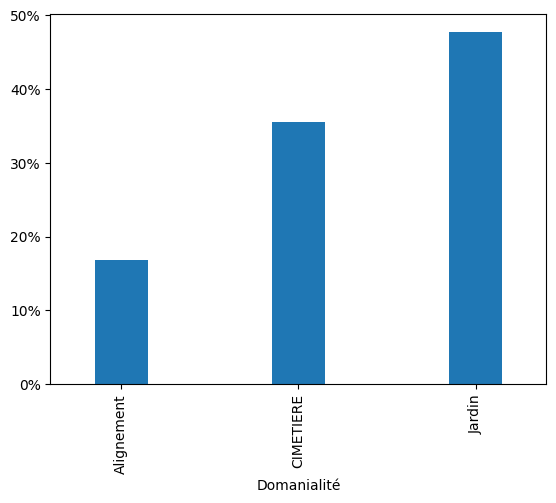

Répartiton des  moyens  arbres par domanialité


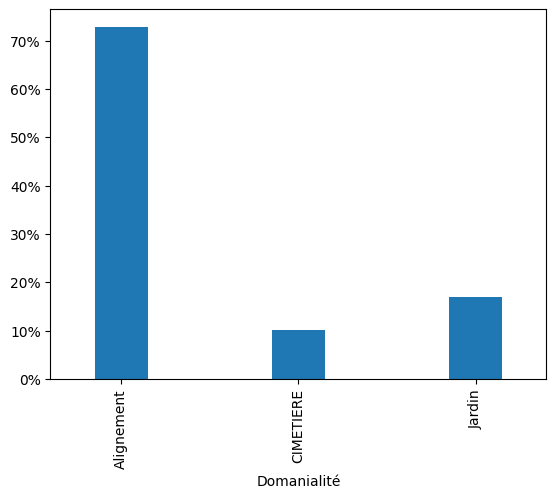

Répartiton des  grands  arbres par domanialité


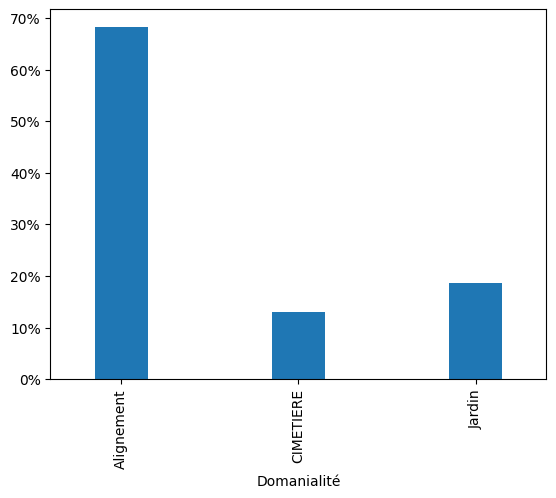

In [29]:
# répartition par domanialité par tranche de taille
for name, values in hauteurs_limite.items():
    subset = data.loc[(data["hauteur_m"]>=values[0]) & (data["hauteur_m"]<values[1]) & ((data["domanialite"]=="Jardin") | (data["domanialite"]=="CIMETIERE") | (data["domanialite"]=="Alignement")),:]
    subset["domanialite"].value_counts(normalize=True).sort_index().mul(100).plot(kind='bar', width=0.3)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
    plt.xlabel("Domanialité")
    print("Répartiton des ", name, " arbres par domanialité")
    plt.show()
# nb_petits_tot = data.loc[data["hauteur_m"]<=4,:]
# nb_petits_cim_jard = data.loc[(data["hauteur_m"]<=4) & ((data["domanialite"]=="Jardin") | (data["domanialite"]=="CIMETIERE")),:]
# print("Les petits arbres sont à ", round(len(nb_petits_cim_jard)/len(nb_petits_tot)*100, 1), " % dans les Cimetières et Jardins")

Répartiton des  petits  arbres par domanialité


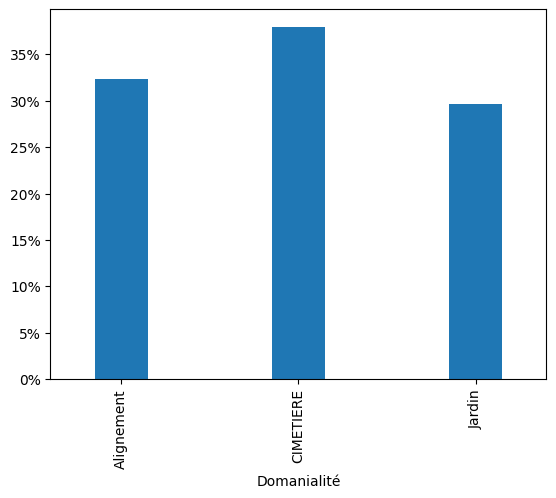

Répartiton des  moyens  arbres par domanialité


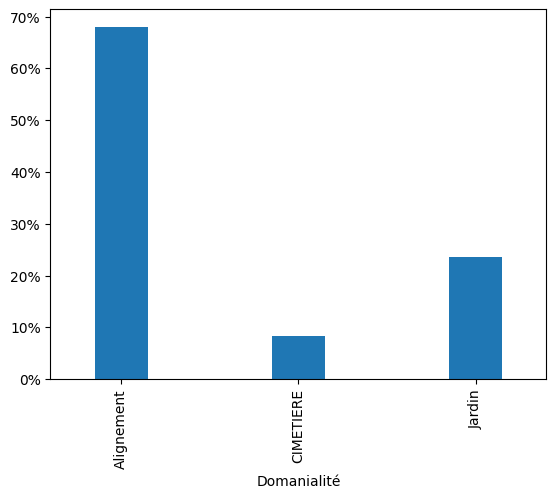

Répartiton des  gros  arbres par domanialité


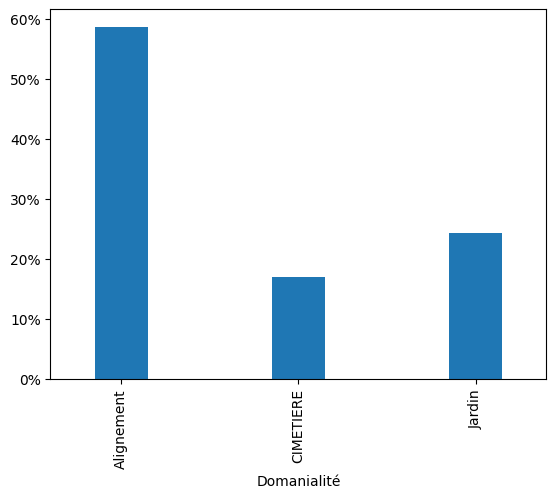

In [30]:
# répartition par domanialité par tranche de taille
for name, values in tranches_circ.items():
    subset = data.loc[(data["circonference_cm"]>=values[0]) & (data["circonference_cm"]<values[1]) & ((data["domanialite"]=="Jardin") | (data["domanialite"]=="CIMETIERE") | (data["domanialite"]=="Alignement")),:]
    subset["domanialite"].value_counts(normalize=True).sort_index().mul(100).plot(kind='bar', width=0.3)
    plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f%%'))
    plt.xlabel("Domanialité")
    print("Répartiton des ", name, " arbres par domanialité")
    plt.show()
# nb_petits_tot = data.loc[data["hauteur_m"]<=4,:]
# nb_petits_cim_jard = data.loc[(data["hauteur_m"]<=4) & ((data["domanialite"]=="Jardin") | (data["domanialite"]=="CIMETIERE")),:]
# print("Les petits arbres sont à ", round(len(nb_petits_cim_jard)/len(nb_petits_tot)*100, 1), " % dans les Cimetières et Jardins")

Répartiton des  petits  arbres par arrondissement


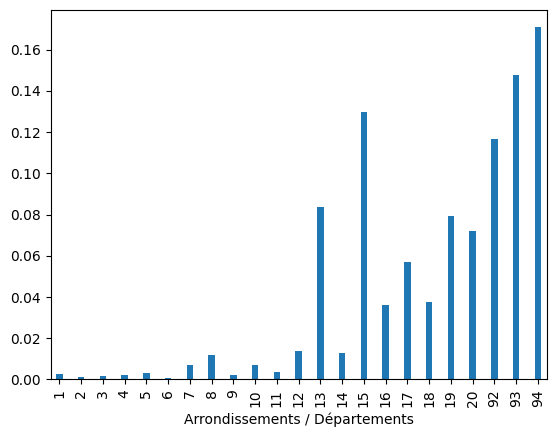

Répartiton des  moyens  arbres par arrondissement


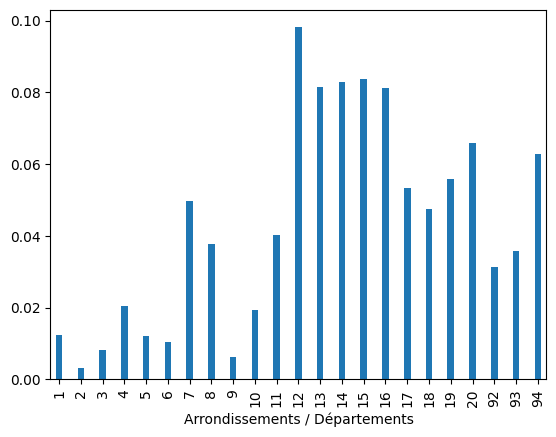

Répartiton des  grands  arbres par arrondissement


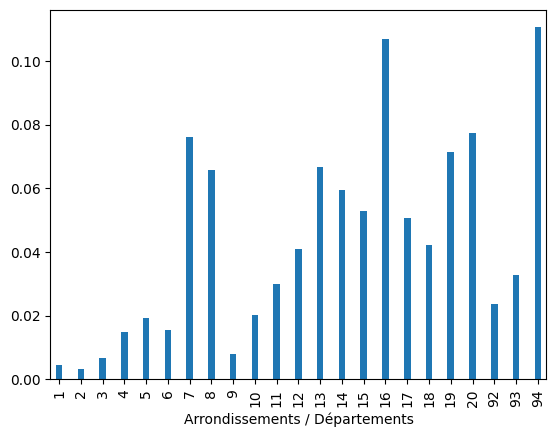

In [31]:
for name, values in hauteurs_limite.items():
    subset = data.loc[(data["hauteur_m"]>=values[0]) & (data["hauteur_m"]<values[1]) & ((data["domanialite"]=="Jardin") | (data["domanialite"]=="CIMETIERE") | (data["domanialite"]=="Alignement")),:]
    subset["arrond"].value_counts(normalize=True).sort_index().plot(kind='bar', width=0.3)
#     plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f%%'))
    plt.xlabel("Arrondissements / Départements")
    print("Répartiton des ", name, " arbres par arrondissement")
    plt.show()

Répartiton des  petits  arbres par arrondissement


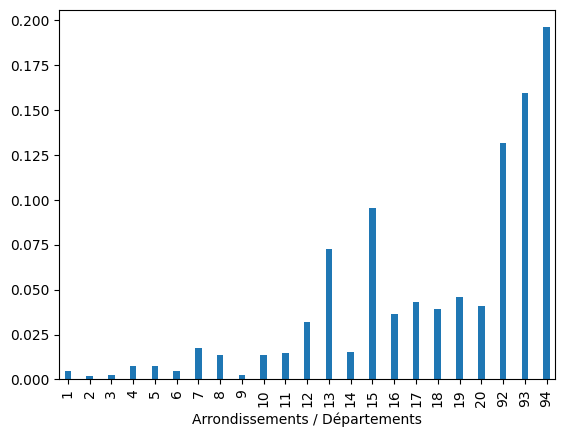

Répartiton des  moyens  arbres par arrondissement


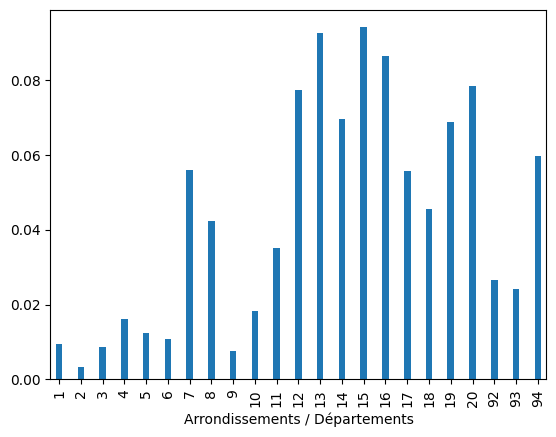

Répartiton des  gros  arbres par arrondissement


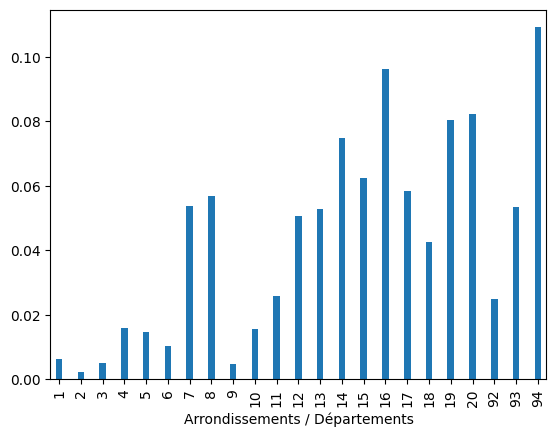

In [32]:
for name, values in tranches_circ.items():
    subset = data.loc[(data["circonference_cm"]>=values[0]) & (data["circonference_cm"]<values[1]) & ((data["domanialite"]=="Jardin") | (data["domanialite"]=="CIMETIERE") | (data["domanialite"]=="Alignement")),:]
    subset["arrond"].value_counts(normalize=True).sort_index().plot(kind='bar', width=0.3)
#     plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f%%'))
    plt.xlabel("Arrondissements / Départements")
    print("Répartition des ", name, " arbres par arrondissement")
    plt.show()

Répartiton des  petits  arbres par arrondissement
moyenne :  1.3840265648920802
médiane :  1.0
mode :  0    1
Name: hauteur_m, dtype: int64
min :  1
max :  4
quartiles :  [1.0, 1.0]
variance :  0.8723825792800753
écart-type :  0.934014228628277
coefficient de variation :  0.6748528188121208
skewness :  2.164204314697482
kurtosis :  2.9575753012889656


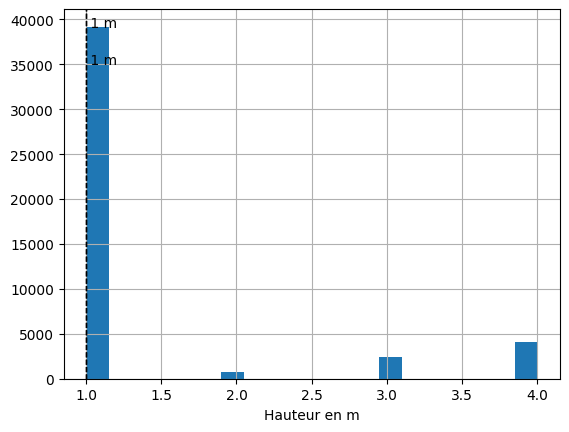

Répartiton des  moyens  arbres par arrondissement
moyenne :  7.633486062467015
médiane :  8.0
mode :  0    10
Name: hauteur_m, dtype: int64
min :  5
max :  11
quartiles :  [5.0, 10.0]
variance :  4.419414594957594
écart-type :  2.1022403751611267
coefficient de variation :  0.275397159038202
skewness :  -0.00901411872705791
kurtosis :  -1.5729195586929356


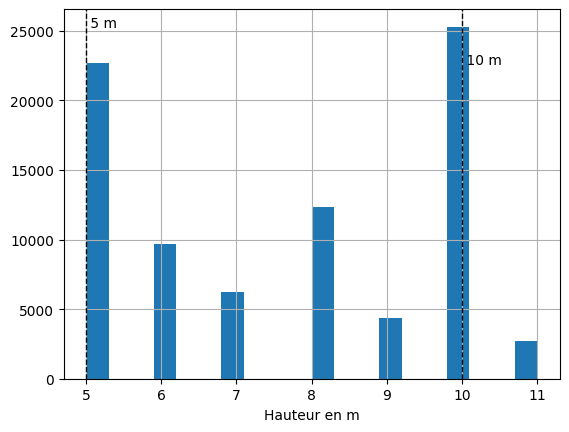

Répartiton des  grands  arbres par arrondissement
moyenne :  16.215928673110064
médiane :  15.0
mode :  0    15
Name: hauteur_m, dtype: int64
min :  12
max :  31
quartiles :  [14.0, 18.0]
variance :  14.681253732231724
écart-type :  3.8316124193649497
coefficient de variation :  0.2362869556597576
skewness :  1.2710659043007704
kurtosis :  1.6834194543268053


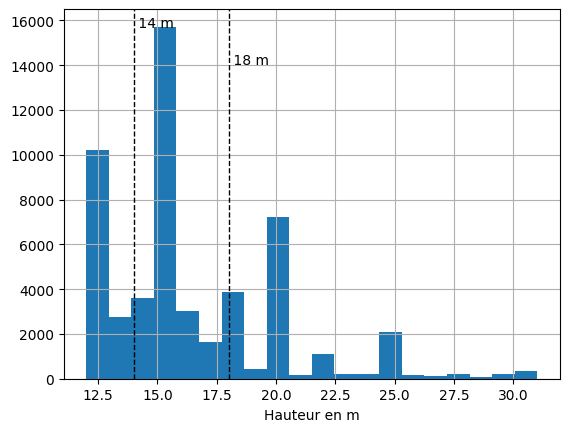

In [33]:
for name, values in hauteurs_limite.items():
    subset = data.loc[(data["hauteur_m"]>=values[0]) & (data["hauteur_m"]<values[1]) & ((data["domanialite"]=="Jardin") | (data["domanialite"]=="CIMETIERE") | (data["domanialite"]=="Alignement")),:]
#     plt.xlabel("Arrondissements / Départements")
    print("Répartiton des ", name, " arbres par arrondissement")
    subset["hauteur_m"].hist(bins=20)
    # mesures de tendances centrales
    print("moyenne : ", subset["hauteur_m"].mean())
    print("médiane : ", subset["hauteur_m"].median())
    print("mode : ", subset["hauteur_m"].mode())
    print("min : ", subset["hauteur_m"].min())
    print("max : ", subset["hauteur_m"].max())
    quartiles = [np.percentile(subset["hauteur_m"], p) for p in [25, 75]]
    print("quartiles : ", quartiles)
    # mesures de dispersion
    print("variance : ", subset["hauteur_m"].var(ddof=0))
    print("écart-type : ", subset["hauteur_m"].std(ddof=0))
    print("coefficient de variation : ", subset["hauteur_m"].std(ddof=0)/subset["hauteur_m"].mean())
    # mesures de forme
    print("skewness : ", subset["hauteur_m"].skew())
    print("kurtosis : ", subset["hauteur_m"].kurtosis())
    plt.xlabel("Hauteur en m")
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(quartiles[0], color='k', linestyle='dashed', linewidth=1)
    plt.text(quartiles[0], max_ylim*0.95, ' {:.0f} m'.format(quartiles[0]))
    plt.axvline(quartiles[1], color='k', linestyle='dashed', linewidth=1)
    plt.text(quartiles[1], max_ylim*0.85, ' {:.0f} m'.format(quartiles[1]))
    plt.show()

Répartiton des  petits  arbres par arrondissement
moyenne :  8.994943199190912
médiane :  1.0
mode :  0    1
Name: circonference_cm, dtype: int64
min :  1
max :  29
quartiles :  [1.0, 20.0]
variance :  104.19780118041783
écart-type :  10.207732421082452
coefficient de variation :  1.134830114547097
skewness :  0.5781438703678794
kurtosis :  -1.518979237411684


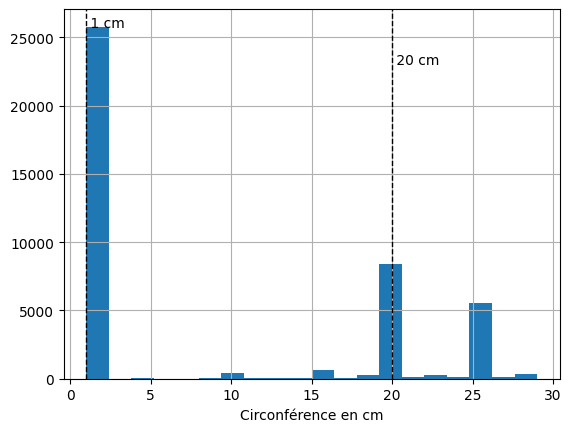

Répartiton des  moyens  arbres par arrondissement
moyenne :  68.60516294202357
médiane :  70.0
mode :  0    70
Name: circonference_cm, dtype: int64
min :  30
max :  114
quartiles :  [50.0, 90.0]
variance :  562.920342430381
écart-type :  23.72594239288254
coefficient de variation :  0.3458331906147168
skewness :  0.07954245725412207
kurtosis :  -1.1103426469822388


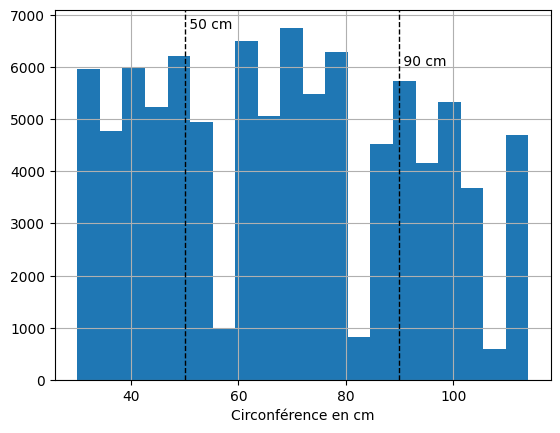

Répartiton des  gros  arbres par arrondissement
moyenne :  166.60667733333332
médiane :  151.0
mode :  0    120
Name: circonference_cm, dtype: int64
min :  115
max :  700
quartiles :  [130.0, 190.0]
variance :  2843.361563946553
écart-type :  53.32318036226415
coefficient de variation :  0.3200542812313542
skewness :  3.250114622430275
kurtosis :  21.762635006719115


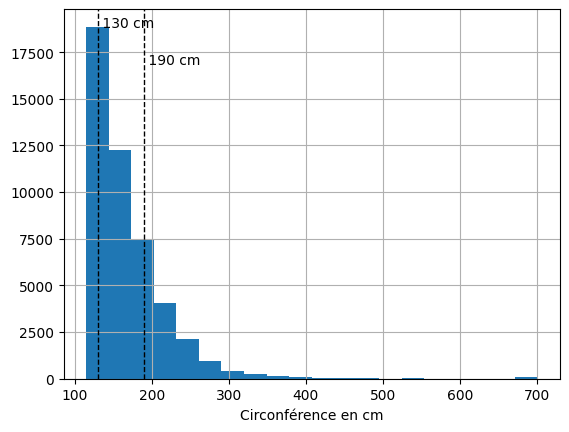

In [34]:
for name, values in tranches_circ.items():
    subset = data.loc[(data["circonference_cm"]>=values[0]) & (data["circonference_cm"]<values[1]) & ((data["domanialite"]=="Jardin") | (data["domanialite"]=="CIMETIERE") | (data["domanialite"]=="Alignement")),:]
#     plt.xlabel("Arrondissements / Départements")
    print("Répartiton des ", name, " arbres par arrondissement")
    subset["circonference_cm"].hist(bins=20)
    # mesures de tendances centrales
    print("moyenne : ", subset["circonference_cm"].mean())
    print("médiane : ", subset["circonference_cm"].median())
    print("mode : ", subset["circonference_cm"].mode())
    print("min : ", subset["circonference_cm"].min())
    print("max : ", subset["circonference_cm"].max())
    quartiles = [np.percentile(subset["circonference_cm"], p) for p in [25, 75]]
    print("quartiles : ", quartiles)
    # mesures de dispersion
    print("variance : ", subset["circonference_cm"].var(ddof=0))
    print("écart-type : ", subset["circonference_cm"].std(ddof=0))
    print("coefficient de variation : ", subset["circonference_cm"].std(ddof=0)/subset["circonference_cm"].mean())
    # mesures de forme
    print("skewness : ", subset["circonference_cm"].skew())
    print("kurtosis : ", subset["circonference_cm"].kurtosis())
    plt.xlabel("Circonférence en cm")
    min_ylim, max_ylim = plt.ylim()
    plt.axvline(quartiles[0], color='k', linestyle='dashed', linewidth=1)
    plt.text(quartiles[0], max_ylim*0.95, ' {:.0f} cm'.format(quartiles[0]))
    plt.axvline(quartiles[1], color='k', linestyle='dashed', linewidth=1)
    plt.text(quartiles[1], max_ylim*0.85, ' {:.0f} cm'.format(quartiles[1]))
    plt.show()

In [ ]:
# définition des tranches
tranches_haut = {
    "petits": [0, 5],
    "moyens": [5, 12],
    "grands": [12, 31]
}
tranches_circ = {
    "petits": [0, 30],
    "moyens": [30, 115],
    "gros": [115, 700]
}

### f) boxplot hauteur en fonction des endroits

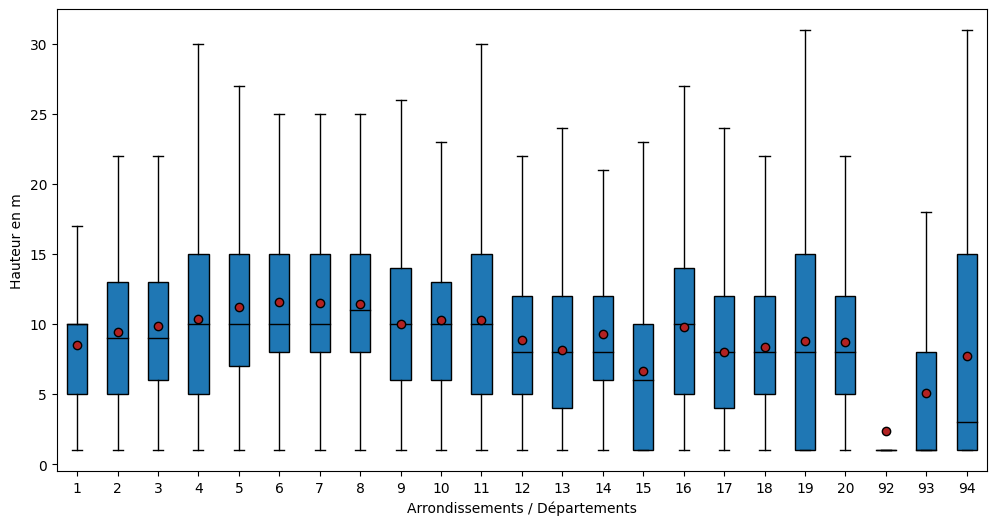

In [61]:
X = "arrond" # qualitative
Y = "hauteur_m" # quantitative

groupes = []
arrond_unique = sorted(data.arrond.unique())
for m in arrond_unique:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(12,6))
plt.boxplot(groupes, labels=arrond_unique, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Arrondissements / Départements")
plt.ylabel("Hauteur en m")
plt.show()

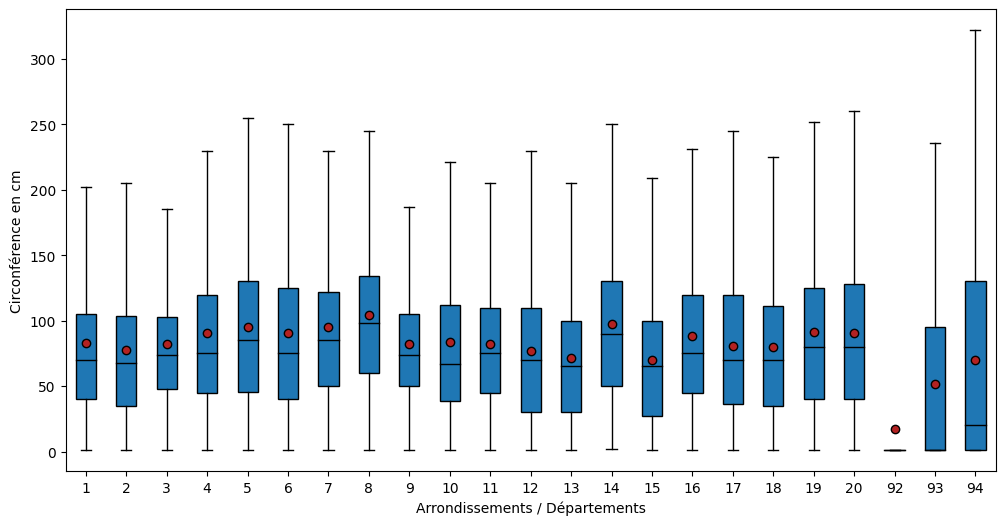

In [62]:
X = "arrond" # qualitative
Y = "circonference_cm" # quantitative

groupes = []
arrond_unique = sorted(data.arrond.unique())
for m in arrond_unique:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(12,6))
plt.boxplot(groupes, labels=arrond_unique, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Arrondissements / Départements")
plt.ylabel("Circonférence en cm")
plt.show()

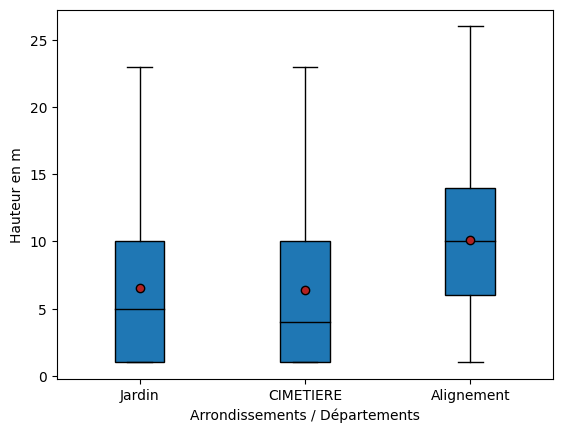

In [48]:
X = "domanialite" # qualitative
Y = "hauteur_m" # quantitative

groupes = []
doman = ['Jardin', 'CIMETIERE', 'Alignement']
for m in doman:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=doman, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Arrondissements / Départements")
plt.ylabel("Hauteur en m")
plt.show()

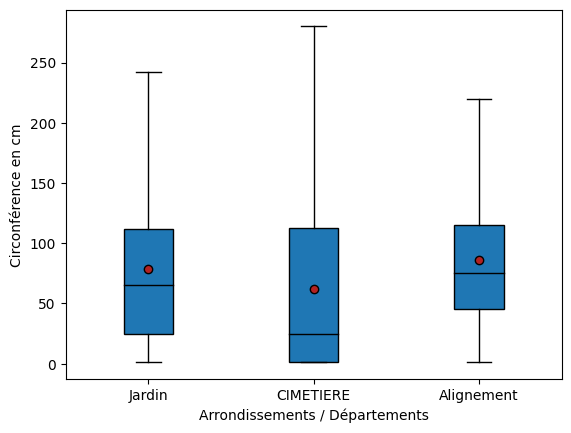

In [49]:
X = "domanialite" # qualitative
Y = "circonference_cm" # quantitative

groupes = []
doman = ['Jardin', 'CIMETIERE', 'Alignement']
for m in doman:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=doman, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Arrondissements / Départements")
plt.ylabel("Circonférence en cm")
plt.show()

In [37]:
# # répartition genres d'arbre en français

# # pour afficher les pourcentages et les libellés pour les parts > 5%
# limit_perc = 5
# def show_perc(pct):
#     return ('%.1f%%' % pct) if pct > limit_perc else ''

# def show_labels(data):
#     list = []
#     for val, cnt in data.items():
#         if (cnt*100/np.sum(data)) > limit_perc :
#             list.append(val)
#         else:
#             list.append('')
#     return list

# # représentation graphique
# temp_val_count = data["libelle_francais"].value_counts(normalize=True)
# temp_val_count.plot(kind='pie', autopct=show_perc, labels=show_labels(temp_val_count))
# plt.axis('equal') 

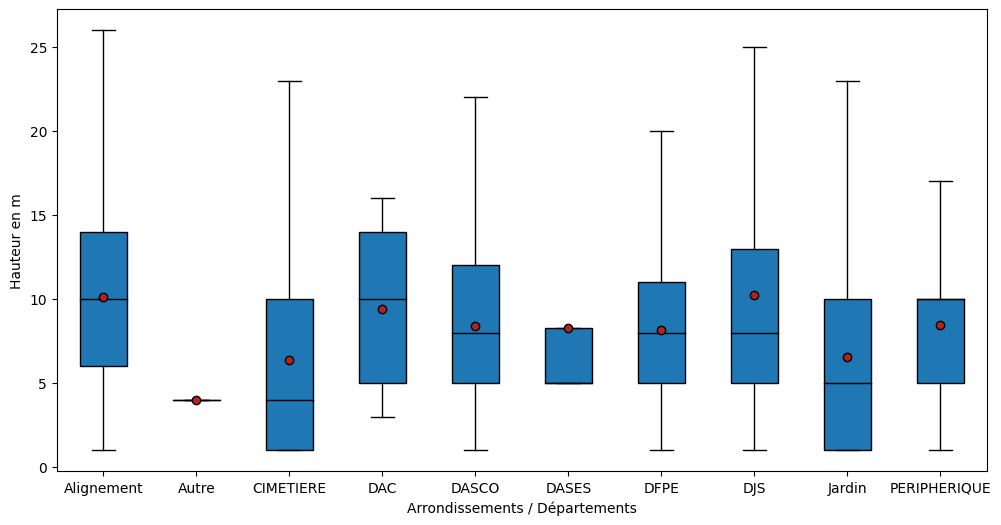

In [70]:
X = "domanialite" # qualitative
Y = "hauteur_m" # quantitative

groupes = []
doman = sorted(data.domanialite.unique())
for m in doman:
    groupes.append(data[data[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
plt.figure(figsize=(12,6))
plt.boxplot(groupes, labels=doman, showfliers=False, medianprops=medianprops, 
            vert=True, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("Arrondissements / Départements")
plt.ylabel("Hauteur en m")
plt.show()

moyenne :  2.3505096262740657
médiane :  1.0
mode :  0    1
Name: hauteur_m, dtype: int64
min :  1
max :  20
quartiles :  [1.0, 1.0]


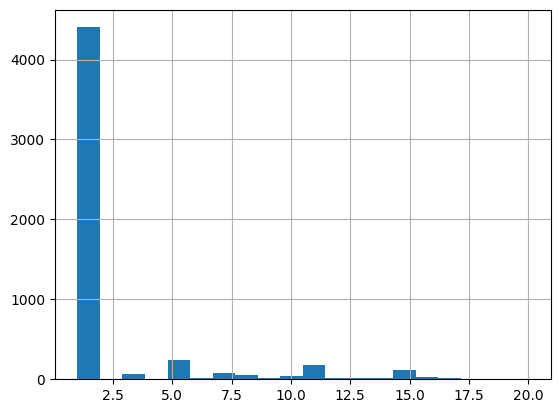

In [68]:
arbres_92 = data.loc[data["arrond"]==92,:]
arbres_92["hauteur_m"].hist(bins=20)
# mesures de tendances centrales
print("moyenne : ", arbres_92["hauteur_m"].mean())
print("médiane : ", arbres_92["hauteur_m"].median())
print("mode : ", arbres_92["hauteur_m"].mode())
print("min : ", arbres_92["hauteur_m"].min())
print("max : ", arbres_92["hauteur_m"].max())
quartiles = [np.percentile(arbres_92["hauteur_m"], p) for p in [25, 75]]
print("quartiles : ", quartiles)